## imports and initial setup

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [47]:
samples = 10000
window_size = 10

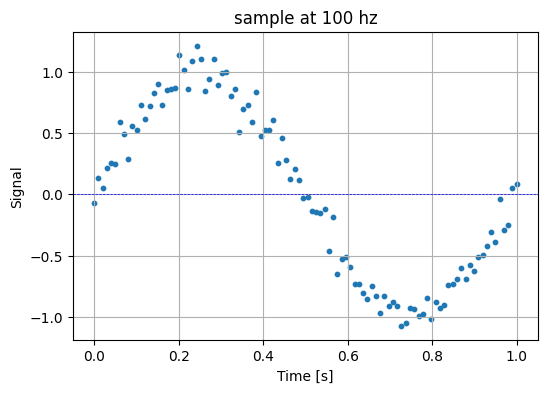

In [48]:
x = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, signal, s=10, label="")
plt.axhline(0, color='blue', linestyle='--', linewidth=0.5)
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title("sample at 100 hz")
plt.grid(True)
plt.show()

In [49]:
x = np.linspace(0, 1, samples)
signal = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, samples)

In [ ]:
def create_sliding_windows(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])  # predict the next value
    return np.array(X), np.array(y)

X, y = create_sliding_windows(signal, window_size)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0324 - mae: 0.1235 - val_loss: 0.0119 - val_mae: 0.0880
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.0116 - mae: 0.0855 - val_loss: 0.0122 - val_mae: 0.0892
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0113 - mae: 0.0842 - val_loss: 0.0122 - val_mae: 0.0889
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.0111 - mae: 0.0842 - val_loss: 0.0119 - val_mae: 0.0879
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - mae: 0.0848 - val_loss: 0.0117 - val_mae: 0.0871
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0113 - mae: 0.0842 - val_loss: 0.0117 - val_mae: 0.0873
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - mae: 0.0855 - val_loss: 0.0125 - val_mae: 0.0899
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0115 - mae: 0.0853 - val_loss: 0.0129 - val_mae: 0.0911
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [53]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.0123 - mae: 0.0893
Test Loss: 0.012545080855488777, Test MAE: 0.09014234691858292


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


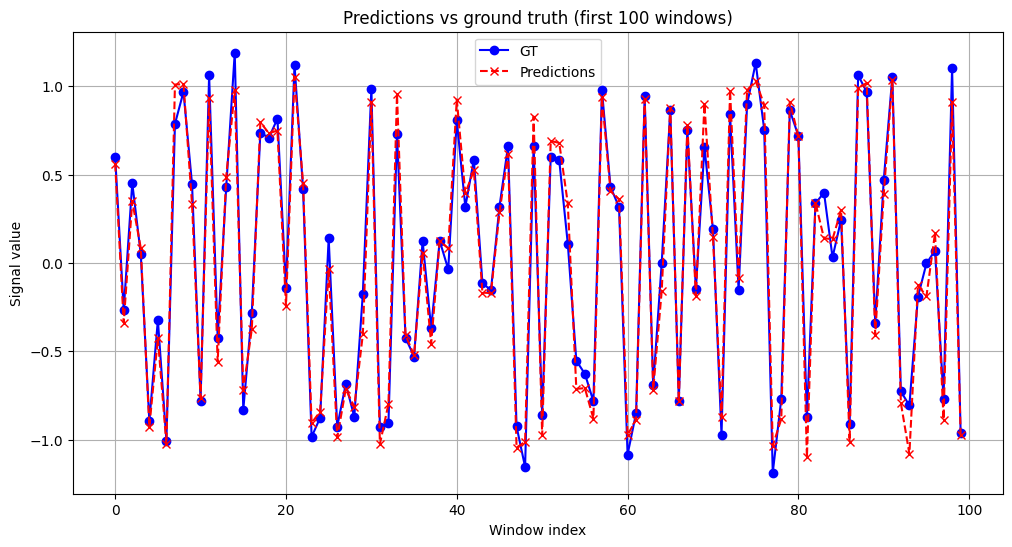

In [54]:
predictions = model.predict(X_test[:100])
ground_truth = y_test[:100]

plt.figure(figsize=(12, 6))
plt.plot(range(100), ground_truth, label='GT', marker='o', linestyle='-', color='blue')
plt.plot(range(100), predictions, label='Predictions', marker='x', linestyle='--', color='red')
plt.xlabel("Window index")
plt.ylabel("Signal value")
plt.title("Predictions vs ground truth (first 100 windows)")
plt.legend()
plt.grid(True)
plt.show()

The predictions closely follow the ground truth for most of the points and it seems the model has successfully captured the trend of the signal and is performing well. However, GT signal has noises and it is mostly because of the gaussian noise that has been added(np.random.normal(0, 0.1, samples)). In general, the sliding window approach works well for this

RNN with a single step and no loop essentially behaves like a fully connected NN (or a feedforward NN) without any recurrence. It does not retain memory or sequential dependencies, making it unsuitable for tasks where temporal patterns or context are crucial

In [55]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size

        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01  # input -> hidden
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # hidden -> hidden
        self.Why = np.random.randn(output_size, hidden_size) * 0.01  # hidden -> output
        self.bh = np.zeros((hidden_size, 1))  # hidden layer bias
        self.by = np.zeros((output_size, 1))  # output bias
        self.h = np.zeros((hidden_size, 1)) # hidden state

    def forward(self, x_t):
        x_t = np.reshape(x_t, (-1, 1))  # (input_size, 1)
        self.h = np.tanh(np.dot(self.Wxh, x_t) + np.dot(self.Whh, self.h) + self.bh)
        y_t = np.dot(self.Why, self.h) + self.by # output(output_size, 1)
        return y_t

In [56]:
np.random.seed(42)
t = np.linspace(0, 1, 100, endpoint=False)
signal = np.sin(2 * np.pi * t) + np.random.normal(0, 0.1, t.shape)

# RNN initialization
input_size = 1
hidden_size = 10
output_size = 1
rnn = SimpleRNN(input_size, hidden_size, output_size)

predictions = []
for x_t in signal:
    y_t = rnn.forward(np.array([x_t]))  # forward pass for one point
    predictions.append(y_t.flatten()[0])


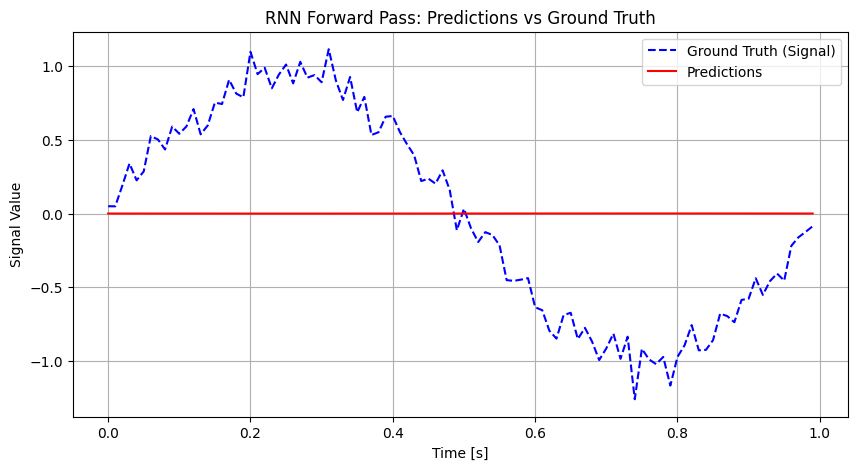

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Ground Truth (Signal)", linestyle="--", color="blue")
plt.plot(t, predictions, label="Predictions", linestyle="-", color="red")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")
plt.title("RNN Forward Pass: Predictions vs Ground Truth")
plt.legend()
plt.grid()
plt.show()

Meaningless predictions as expected since it has not been trained yet

### Training

Why do you have to unroll the network?

In RNN, backprop is applied across both time steps and layers in the network. We know this as BPTT from lectures. To compute gradients of weights and biases with respect to the loss function at all time steps, we need to "unroll" the network over a sequence of time steps

In [77]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.Wx = np.random.randn(hidden_size, input_size) * 0.01 # input -> hidden
        self.Wh = np.random.randn(hidden_size, hidden_size) * 0.01 # hidden -> hidden
        self.Wy = np.random.randn(output_size, hidden_size) * 0.01 # hidden -> output
        self.bh = np.zeros((hidden_size, 1)) # hidden layer bias
        self.by = np.zeros((output_size, 1)) # output bias
    
    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1)) # initial hidden state
        outputs = [] # to store the output of the model
        hs = []
        for x in inputs:
            x = x.reshape(-1, 1) # make it column vector
            h = np.tanh(np.dot(self.Wx, x) + np.dot(self.Wh, h) + self.bh) 
            y = np.dot(self.Wy, h) + self.by 
            outputs.append(y)
            hs.append(h) 
        return outputs, hs # return all outputs and hidden states

    def backward(self, inputs, targets, outputs, hs, learning_rate=0.01):
        dWx, dWh, dWy = np.zeros_like(self.Wx), np.zeros_like(self.Wh), np.zeros_like(self.Wy) 
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by) # initialize gradients
        dh_next = np.zeros_like(hs[0]) # initialize the next hidden state gradient

        for t in reversed(range(len(inputs))): # iterate over all time steps
            dy = outputs[t] - targets[t].reshape(-1, 1)
            dWy += np.dot(dy, hs[t].T)
            dby += dy
            dh = np.dot(self.Wy.T, dy) + dh_next
            dh_raw = (1 - hs[t] ** 2) * dh
            dbh += dh_raw
            dWx += np.dot(dh_raw, inputs[t].reshape(1, -1))
            if t > 0: # if not the first time step
                dWh += np.dot(dh_raw, hs[t-1].T)
            dh_next = np.dot(self.Wh.T, dh_raw)

        for dparam in [dWx, dWh, dWy, dbh, dby]: 
            np.clip(dparam, -1, 1, out=dparam) # gradient clipping to avoid exploding gradients

        self.Wx -= learning_rate * dWx # update the weights
        self.Wh -= learning_rate * dWh
        self.Wy -= learning_rate * dWy
        self.bh -= learning_rate * dbh
        self.by -= learning_rate * dby

# regenerate the signal
samples = 10000
x = np.linspace(0, 1, samples)
signal = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, samples)

window_size = 10
X, y = create_sliding_windows(signal, window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

input_size = 1
hidden_size = 50
output_size = 1
rnn = SimpleRNN(input_size, hidden_size, output_size)

epochs = 20
learning_rate = 0.01

In [78]:
for epoch in range(epochs):
    total_loss = 0
    for t in range(len(X_train) - window_size):
        inputs = X_train[t]
        targets = y_train[t:t + window_size]

        # forward pass
        outputs, hs = rnn.forward(inputs)
        predictions = outputs[-1]

        # loss computation
        loss = np.mean((predictions - targets[-1].reshape(-1, 1)) ** 2)
        total_loss += loss

        # backward pass
        rnn.backward(inputs, targets, outputs, hs, learning_rate)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(X_train)}")

Epoch 1/20, Loss: 0.5325513783132747
Epoch 2/20, Loss: 0.5390358431538745
Epoch 3/20, Loss: 0.5447779276398157
Epoch 4/20, Loss: 0.5464432470055637
Epoch 5/20, Loss: 0.5441329838756136
Epoch 6/20, Loss: 0.5404433495153995
Epoch 7/20, Loss: 0.5461041157619231
Epoch 8/20, Loss: 0.5488695235274911
Epoch 9/20, Loss: 0.5500184207022589
Epoch 10/20, Loss: 0.5506615011772086
Epoch 11/20, Loss: 0.5509873755462174
Epoch 12/20, Loss: 0.5512385557859316
Epoch 13/20, Loss: 0.5512939800638216
Epoch 14/20, Loss: 0.5512698278079813
Epoch 15/20, Loss: 0.5511802388023314
Epoch 16/20, Loss: 0.5510940493638545
Epoch 17/20, Loss: 0.5510179835131399
Epoch 18/20, Loss: 0.550955338719377
Epoch 19/20, Loss: 0.5508902790571305
Epoch 20/20, Loss: 0.5508158901438895


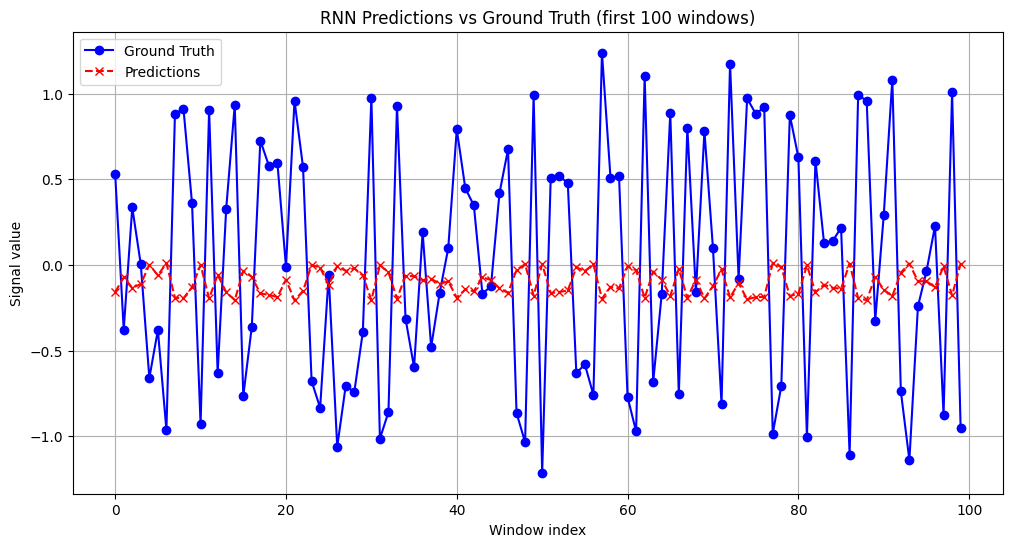

In [79]:
predictions = []
for t in range(len(X_test) - window_size):
    inputs = X_test[t]
    output, _ = rnn.forward(inputs)
    predictions.append(output[-1])
predictions = np.array(predictions).flatten()

# predictions vs GT
plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[:100], label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(range(100), predictions[:100], label='Predictions', marker='x', linestyle='--', color='red')
plt.xlabel("Window index")
plt.ylabel("Signal value")
plt.title("RNN Predictions vs Ground Truth (first 100 windows)")
plt.legend()
plt.grid(True)
plt.show()

In [100]:
path = 'dinousaur-island.txt'

with open(path, 'r') as f:
    names = [line.strip().upper() + "$" for line in f.readlines()]

# One-hot encoding
chars = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ$")
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

def one_hot_encode(char):
    vec = np.zeros((len(chars), 1))
    vec[char_to_ix[char]] = 1
    return vec

def encode_sequence(name):
    return [one_hot_encode(char) for char in name]

def decode_sequence(encoded_seq):
    return "".join(ix_to_char[np.argmax(vec)] for vec in encoded_seq)

# convert all names to one-hot encoded sequences
encoded_names = [encode_sequence(name) for name in names]


In [101]:
# RNN adjusted for the task
class SimpleCharRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.Wx = np.random.randn(hidden_size, input_size) * 0.01  # Input -> Hidden
        self.Wh = np.random.randn(hidden_size, hidden_size) * 0.01  # Hidden -> Hidden
        self.Wy = np.random.randn(output_size, hidden_size) * 0.01  # Hidden -> Output
        self.bh = np.zeros((hidden_size, 1))  # Hidden bias
        self.by = np.zeros((output_size, 1))  # Output bias

    def forward(self, inputs, h_prev):
        hs, outputs = [], []
        h = h_prev
        for x in inputs:
            h = np.tanh(np.dot(self.Wx, x) + np.dot(self.Wh, h) + self.bh)
            y = np.dot(self.Wy, h) + self.by
            hs.append(h)
            outputs.append(self.softmax(y))
        return outputs, hs, h

    def backward(self, inputs, targets, outputs, hs, h_prev, learning_rate=0.01):
        dWx, dWh, dWy = np.zeros_like(self.Wx), np.zeros_like(self.Wh), np.zeros_like(self.Wy)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dh_next = np.zeros_like(hs[0])

        for t in reversed(range(len(inputs))):
            dy = outputs[t] - targets[t]
            dWy += np.dot(dy, hs[t].T)
            dby += dy
            dh = np.dot(self.Wy.T, dy) + dh_next
            dh_raw = (1 - hs[t] ** 2) * dh
            dbh += dh_raw
            dWx += np.dot(dh_raw, inputs[t].T)
            dWh += np.dot(dh_raw, hs[t-1].T) if t > 0 else np.dot(dh_raw, h_prev.T)
            dh_next = np.dot(self.Wh.T, dh_raw)

        for dparam in [dWx, dWh, dWy, dbh, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        self.Wx -= learning_rate * dWx
        self.Wh -= learning_rate * dWh
        self.Wy -= learning_rate * dWy
        self.bh -= learning_rate * dbh
        self.by -= learning_rate * dby

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x, axis=0)

In [ ]:
input_size = len(chars)
hidden_size = 50
output_size = len(chars)
rnn = SimpleCharRNN(input_size, hidden_size, output_size)

epochs = 50
learning_rate = 0.01

for epoch in range(epochs):
    total_loss = 0
    h_prev = np.zeros((hidden_size, 1))  # reset hidden state

    for name in encoded_names:
        inputs = name[:-1]
        targets = name[1:]

        # forward pass
        outputs, hs, h_prev = rnn.forward(inputs, h_prev)

        # loss computation (cross-entropy loss)
        loss = -np.sum([np.log(output[np.argmax(target)]) for output, target in zip(outputs, targets)])
        total_loss += loss

        # backward pass
        rnn.backward(inputs, targets, outputs, hs, h_prev, learning_rate)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(encoded_names)}")


Epoch 1/20, Loss: 27.614855670775263
Epoch 2/20, Loss: 22.458177570771003
Epoch 3/20, Loss: 21.371930901307366
Epoch 4/20, Loss: 20.76067286171189
Epoch 5/20, Loss: 20.391380830160816
Epoch 6/20, Loss: 20.156318617796163
Epoch 7/20, Loss: 19.97344017861129
Epoch 8/20, Loss: 19.834244890499633
Epoch 9/20, Loss: 19.664702273442003
Epoch 10/20, Loss: 19.645420918549437
Epoch 11/20, Loss: 19.579514467388524
Epoch 12/20, Loss: 19.461790790837586
Epoch 13/20, Loss: 19.42597735095306
Epoch 14/20, Loss: 19.316995876355918
Epoch 15/20, Loss: 19.341900495072267
Epoch 16/20, Loss: 19.428709038396583
Epoch 17/20, Loss: 19.300322222375048
Epoch 18/20, Loss: 19.224488024257557
Epoch 19/20, Loss: 19.20472915567701
Epoch 20/20, Loss: 19.21784052594629


In [115]:
def sample(rnn, seed_char, max_length=10):
    h = np.zeros((rnn.hidden_size, 1))
    x = one_hot_encode(seed_char)
    name = seed_char

    for _ in range(max_length):
        outputs, _, h = rnn.forward([x], h)
        probs = outputs[-1]
        idx = np.random.choice(range(len(chars)), p=probs.ravel())
        next_char = ix_to_char[idx]
        if next_char == "$":
            break
        name += next_char
        x = one_hot_encode(next_char)

    return name

print("\##########")
for _ in range(3):
    print(sample(rnn, "A"))

print("\##########")
for _ in range(5):
    print(sample(rnn, "M"))
    print(sample(rnn, "E"))
    print(sample(rnn, "O"))

\##########
AMULE
ALGOSAURUS
AUR
\##########
MURNIRYIA
ELUCHEYGAUK
OSACMIA
MUYLGUCELON
EGOS
OTLONGOSLIN
MUCUCHONNIS
ELUNSKENGTE
OHUXIANGTUR
MUWASAURUS
ENONG
OLUROSAURUS
MNOUNODROSA
ELULONGOSAU
OCHUCERATOP
